# Recidivism programs

## Chi-squared Goodness-of-fit test

August 2015 

*Modified April 2018*

Author: Jon Kastelan *(acknowledging Federica Bianco)*

Reproduce one of the results in *Table 2.1* of http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf


In [1]:
from __future__ import print_function, division
import os
import sys
import numpy as np
import pylab as pl
from IPython.display import Image

import json
import os

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:

def evalChisq(values):
    '''Evaluates the chi sq from a contingency value
    Arguments:
    values: 2x2 array or list, the contingency table
    '''
    if not (len(values.shape) == 2 and values.shape == (2,2)):
        print ("must pass a 2D array")
        return -1
    values = np.array(values)
    E = np.empty_like(values)
    for j in range(len(values[0])):
        for i in range(2):
            
            E[i][j] = ((values[i,:].sum() * values[:,j].sum()) / 
                        (values).sum())
    return ((values - E)**2 / E).sum()


# Lets assess the values for where the former inmate was or was not "Convicted of a felony" (row 10) in the Recidivism (Years 1-3)?


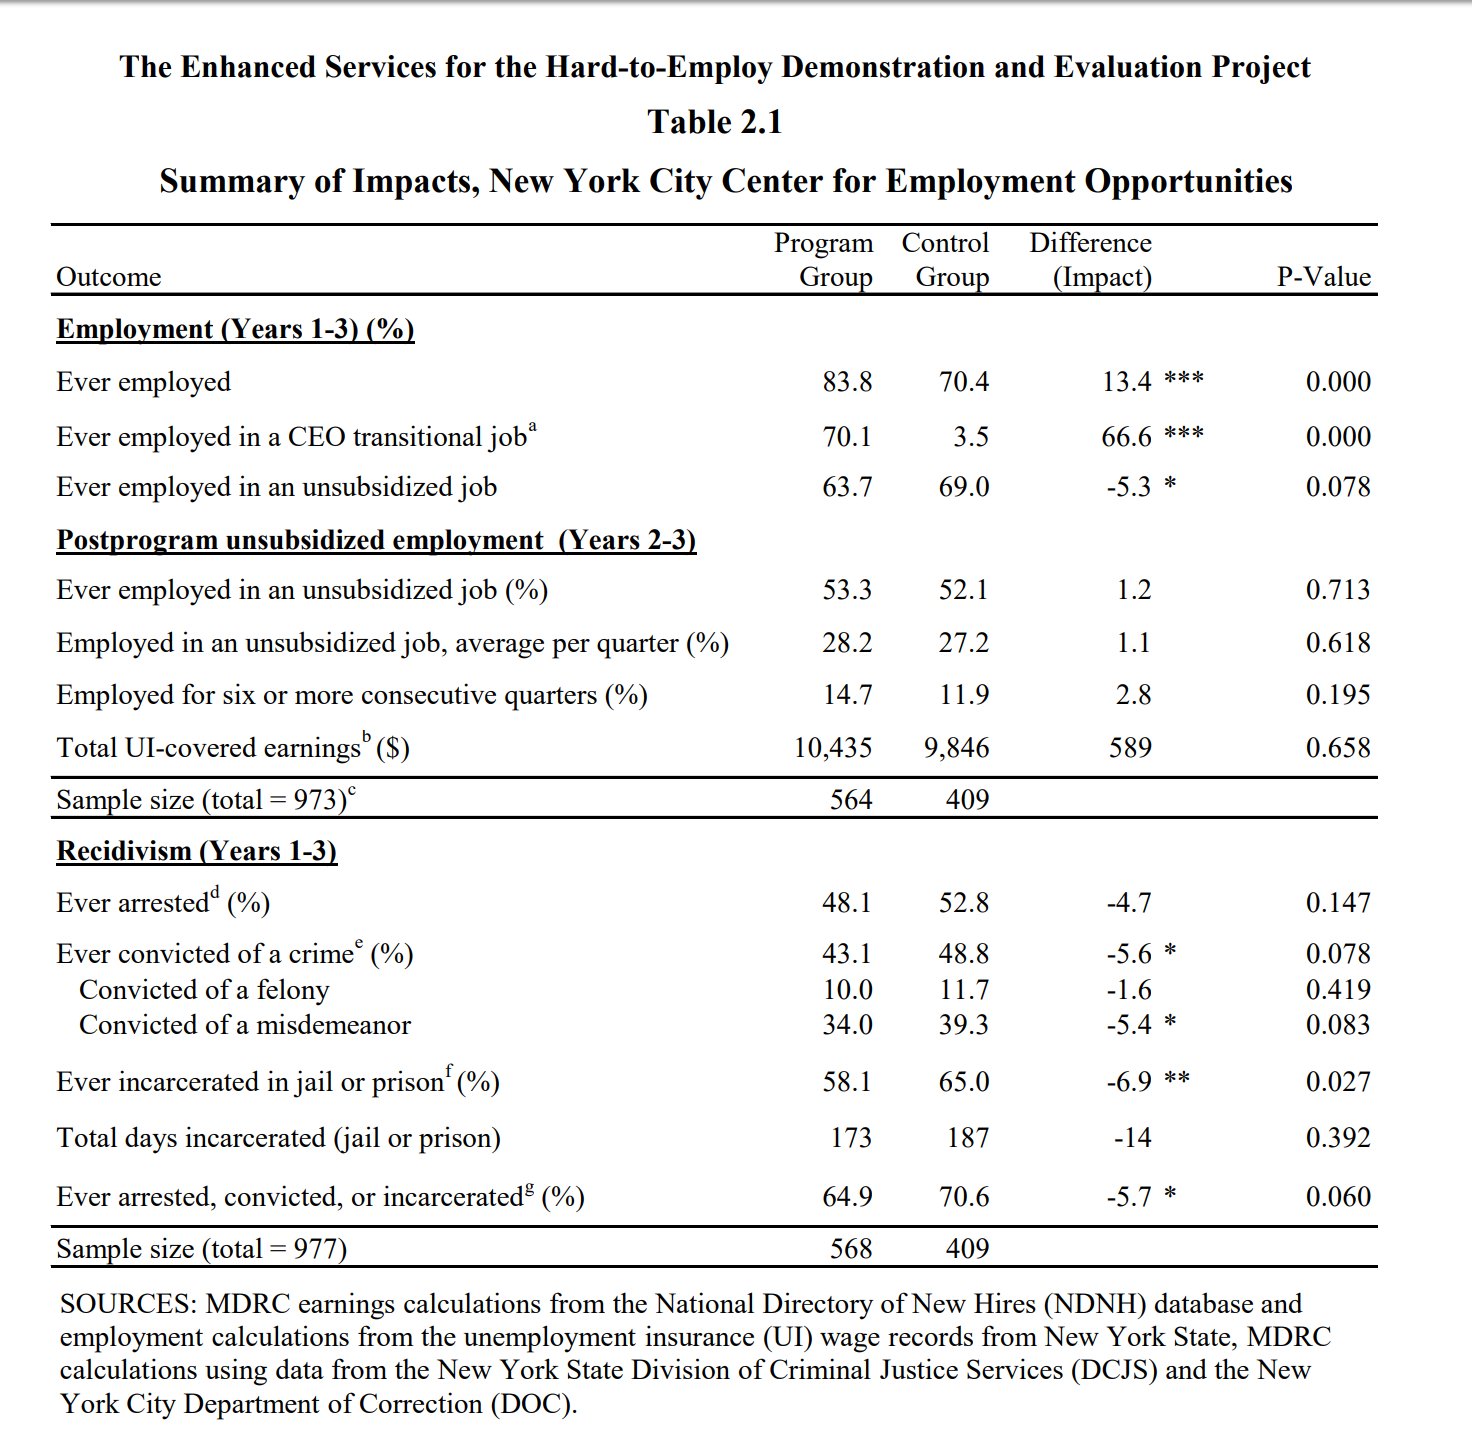

In [3]:
Image('Recidivism_paper.png')


## Null hypothesis: The % of prisoners who were convicted of a felony who reoffend within 1-3 years of being released is the same or higher or candidates who participated in the program as compared to the control group.

## Significance level alpha = 0.05

** $H_0: P_0 - P_1$** $\leq$    0 
    
** $H_a: P_0 - P_1 $** > 0    

$\alpha  = 0.05$    

** $P_0=0.117, P_1=0.10$**

In [4]:

alpha=0.05 #size of test
# we like fractions better then percentages. as a rule of thumb, either use fractions or counts
P_0 = 0.117 
P_1 = 0.10

if P_0 - P_1 <= 0:
    # we are done
    print ("The Null holds")
else:
    print ("We must assess the statistical significance")

n_0 = 409
n_1 = 568

#lets get the counts by multiplying by the sample size
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1


We must assess the statistical significance


In [5]:
# Create one line function to calculate the standard error
# and to calculate p

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) 


### Z-score

In [6]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_3y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print ("The test statistic is: {}".format(round(z_3y,6)))


The test statistic is: -0.84764


### Hypothesis test

In [7]:
## p-value for Recidivism within Years 1-3: 
## From the table, the probability under the curve
## up to the z-score of -0.8476 is 0.7797 - 0.5
##
##
##
##

p_3y = 0.7797 - 0.500


def report_result(p,a):
    print ('Is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}??'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('The Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_3y, alpha)

Is the p value 0.28 smaller than the critical value 0.05??
NO!
The Null hypothesis is not rejected


# Chi-squared test



Contingency table populated with "Convicted of a felony" (row 10) and Recidivism (Years 1-3)? *

|convicted of a fellony     |     yes   | no        |                   
|---------------------------|-----------|-----------|----------------|
| test sample               |   0.10∗568        |      0.90∗568     |      568          |
| control sample            |     0.117∗409      |      0.883∗409     |     409           |
|                           |           |           |                |
| total                     |      104.653    |   872.347       |         977       |

In [8]:
Ntot = 973 # a + b + c + d = tot

test_stat = np.array([[0.10 * 568, 0.90 * 568], [0.117 * 409, 0.883 * 409]])

print ("The test statistic is: {}".format(round(evalChisq(test_stat),6)))

The test statistic is: 0.718494



## What do we compare our test statistic to?

We are interested in comparing the test statistic to the Chi-squared distribution with 1 degree of freedom at the $\alpha = 0.05$. The table value of for $\alpha = 0.05$ with 1 degree of freedom is 3.84.



## How does the chi square statistic that you derived compare?

Compare the calculated test statistic 0.7185 to 3.84


## Conclude the test!

As the calculated test statistic is not larger than the value from the table (chi-squared 1 d.f. = 3.84), therefore **do not** reject the null hypothesis

